### 웹 크롤링
- 크롤링을 통해서 웹 사이트에서 데이터를 수집하는 행위

### 인공지능 개발 과정
1. 데이터 수집
2. 데이터 저장
3. 탐색적 데이터 분석(EDA)
4. 데이터 가공
5. 베이스라인 모델 개발
6. 성능 평가
7. 모델 튜닝
8. 서비스

### 데이터 수집 방법
1. 서버 -> 서비스를 하는 컴퓨터, 모니터 굳이 필요X, 하드웨어만 있으면 됨. if 모니터 필요하면 그때 연결
2. 데이터베이스
3. Open API
4. RAW(CSV, XLSW, TXT 등)
5. 웹 크롤링

### HTML, CSS 

### 웹 크롤링 기술
1. 정적 페이지 > requests + Beautifulsoup4
2. 동적 페이지 > selenium 

In [ ]:
# requests 

#      클라이언트(웹 브라우저)
#      ↓(request) ↑(response)
#             서버

# 회사(AI 부서) : 고양이, 강아지 분류하는 인공지능 모델 개발!
# 회사(웹 부서) : 웹 서비스 개발

# 1. 프론트엔드(이미지 업로드)
# 2. 백엔드(API)
# 3. 백엔드 → request → 인공지능 API 

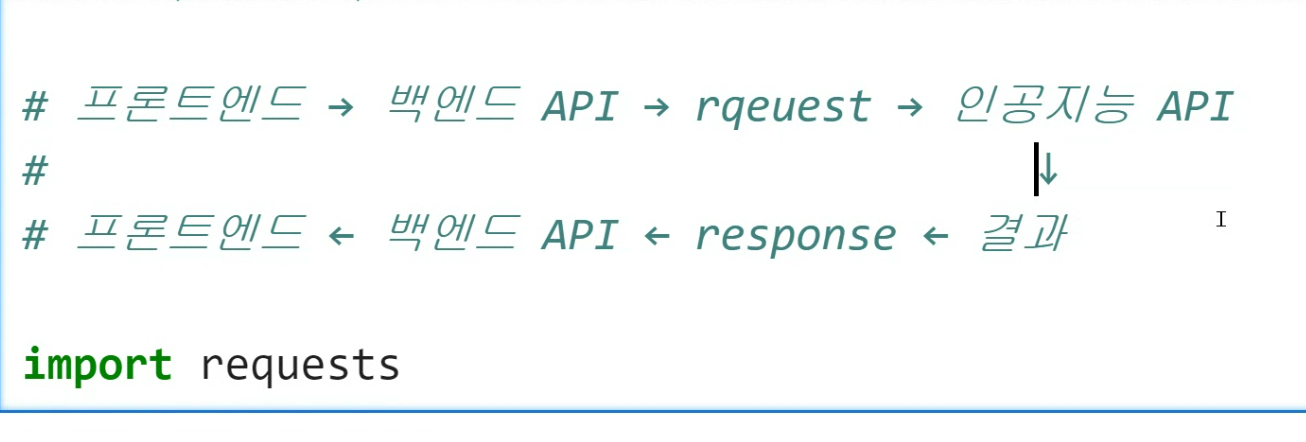

In [1]:
# 프론트
import requests

response = requests.get("https://news.naver.com")
print(response)

# HTTP는 response(status_code : 200, 400, 500)
# 200 : 통신 성공 : 요청 → 응답 받음!
# 400 : 클라이언트 측 ERROR
# 500 : 서버 측 ERROR

<Response [200]>


In [2]:
# requests 모듈은 응답으로 해당 URL의 페이지소스 전체 가지고 옴!
print(response.text)


<!doctype html>
<html lang="ko">
	<head>
		<title id="browserTitleArea">네이버 뉴스</title>
		


<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>

		<script>
		var g_ssc = 'news.v3_media' || null;
		var bSupportedIntersectionObserver = "IntersectionObserver" in window;
		</script>
		

In [3]:
# Beautifulsoup
# - requests가 가져온 전체 html 소스 안에서
#   선택자를 이용해 원하는 데이터를 추출
# - 문서를 파싱하여, 트리 구조로 만들어서 특정 태그를 쉽게 찾을 수
#   있도록 도와주는 라이브러리
from bs4 import BeautifulSoup as bs

soup = bs(response.text, "lxml") # lxml이 파이썬이 html 읽을 수 있도록 도와줌.
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		var bSupportedIntersectionObserver = "IntersectionObserver" in window;
		</script>
<meta charset=

In [5]:
# id 선택자 : #          > 유니크하게 1개
# class 선택자 : .       > 복수
# 자식 선택자 : >
# 자손 선택자 : 한칸 띄기

# PYTHON 컬렉션 타입
#   1. LIST []
#   2. TUPLE ()
#   3. dict {key : value} -> JSON Type
#   4. set {}

# bs의 select() -> List Type
data = soup.select("span.Nitem_link_menu")

#body > section > header > div.Nlnb._float_lnb > div > div > div > div > div > ul > li.Nlist_item.is_active > a > span  
# > 개발자도구우클릭 copy selector

print(data[5])

<span class="Nitem_link_menu">IT/과학</span>


In [6]:
# .text는 태그 정보 지우기!
for i in data:
    print(i.text)

언론사별
정치
경제
사회
생활/문화
IT/과학
세계
랭킹
신문보기
오피니언
TV
팩트체크
알고리즘 안내
정정보도 모음


In [8]:
# 기본 Python
news_item = []
for i in data:
    news_item.append(i.text)
print(news_item)

# 리스트 컴프리헨슨
news_item = [i.text for i in data]
print(news_item)

['언론사별', '정치', '경제', '사회', '생활/문화', 'IT/과학', '세계', '랭킹', '신문보기', '오피니언', 'TV', '팩트체크', '알고리즘 안내', '정정보도 모음']
['언론사별', '정치', '경제', '사회', '생활/문화', 'IT/과학', '세계', '랭킹', '신문보기', '오피니언', 'TV', '팩트체크', '알고리즘 안내', '정정보도 모음']


### 네이버에서 LLM 검색 후 나오는 뉴스 제목 수집하기! 

In [18]:
# 1. 데이터 수집 URL 설정
url = "https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=llm"

# 2. HTML 소스 전체 가져오기(request)
response = requests.get(url)
# print(response)

# 3. python 형식으로 html 트리 인덱싱(beautifulSoup)
soup = bs(response.text, "lxml")

# 4. 원하는 데이터 select
data = soup.select("a.news_tit")


for i, val in enumerate(data): # i의 인덱스값도 추가됨.
    #print(i+1,val.text)
    print(f"{i+1}. {val.text}")

1. 국내 최대 한국어 LLM 리더보드, 시즌2 개시…"지표 전면개편"
2. 아밀라AI "AI리스크 해결···보험 등 3대 서비스 론칭"
3. 경량형 AI 모델 경쟁 가속…성능은 '높게' 비용은 '낮게'
4. 유라클, 고려대와 LLM 공동 연구개발 협약
5. LG, 경량화 AI 적용한 노트북 세계 첫 출시
6. KT "MS와 한국 특화형 LLM·sLM 출시 예정"
7. KT "MS와 한국형 LLM·소버린 AI 개발"
8. [비바100] 뤼튼, AI시대 정보 획득의 패러다임을 바꾸다
9. SKT만 2분기 웃었다...통신3사, AI 서비스 출시 '고삐'
10. 한국사회의 Al 전략은?


['국내 최대 한국어 LLM 리더보드, 시즌2 개시…"지표 전면개편"', '아밀라AI "AI리스크 해결···보험 등 3대 서비스 론칭"', "경량형 AI 모델 경쟁 가속…성능은 '높게' 비용은 '낮게'", '유라클, 고려대와 LLM 공동 연구개발 협약', 'LG, 경량화 AI 적용한 노트북 세계 첫 출시', 'KT "MS와 한국 특화형 LLM·sLM 출시 예정"', 'KT "MS와 한국형 LLM·소버린 AI 개발"', '[비바100] 뤼튼, AI시대 정보 획득의 패러다임을 바꾸다', "SKT만 2분기 웃었다...통신3사, AI 서비스 출시 '고삐'", '한국사회의 Al 전략은?']
